In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter
import numpy as np

from scipy.misc import factorial
rand = np.random.rand

In [2]:
def Poisson(m,z=1): return np.exp(-z)*z**m/factorial(m)

This simulates throwing `nballs` balls into `nbins` bins, with average `z = nballs/nbins`:

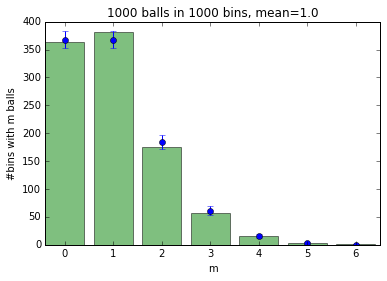

In [3]:
nbins=1000
nballs=1000
z=nballs/float(nbins)

balls_in_bin=Counter(map(int,nbins*rand(nballs)))
c=Counter(balls_in_bin.values())
c[0]= nbins-sum(c.values()) #bins with no balls

m=np.arange(max(c.keys())+1)  #an array of values [0,1,2,...]
p=Poisson(m,z)                #so also an array of values
yerr=np.sqrt(nbins*p*(1-p))   #and also an array of values

plt.bar(m,[c[m0] for m0 in m],color='g',align='center',alpha=.5)
plt.errorbar(m,nbins*p,yerr,fmt='o')

plt.xlim(-.4,m[-1]+.5)
plt.ylim(0,)
plt.xlabel('m')
plt.ylabel('#bins with m balls')
plt.title('{} balls in {} bins, mean={}'.format(nballs,nbins,z));

We can also divide everything by nbins to get the probabilities (note that the stderr now has nbins in the denominator under the squareroot):

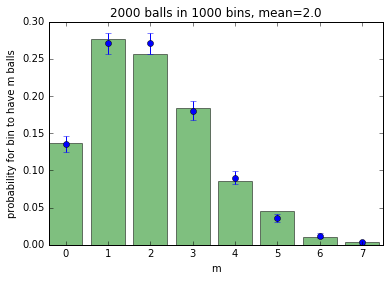

In [4]:
nbins=1000
nballs=2000
z=nballs/float(nbins)

balls_in_bin=Counter(map(int,nbins*rand(nballs)))
c=Counter(balls_in_bin.values())
c[0]=nbins-sum(c.values())  #bins with no balls

m=np.arange(max(c.keys())+1)  #an array of values [0,1,2,...]
p=Poisson(m,z)                #so also an array of values
yerr=np.sqrt(p*(1-p)/nbins)   #and also an array of values

plt.bar(m,[c[m0]/float(nbins) for m0 in m],color='g',align='center',alpha=.5)
plt.errorbar(m,p,yerr,fmt='o')

plt.xlim(-.4,m[-1]+.5)
plt.ylim(0,)
plt.xlabel('m')
plt.ylabel('probability for bin to have m balls')
plt.title('{} balls in {} bins, mean={}'.format(nballs,nbins,z));

Note that the above `Poisson()` function defined above is also available as a standard library function `poisson.pmf()`

    from scipy.stats import poisson

(see http://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.poisson.html
for various other `poisson()` methods such as .rvs() for drawing random samples, .cdf() for cumulative distribution function, and so on)